In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sklearn.tree import DecisionTreeRegressor
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from math import sqrt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv('Manhattan_Noise.csv')
df

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Date
0,1,35139300,2017-01-01 00:03:41,2017-01-01 03:49:13,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,60 THAYER STREET,THAYER STREET,...,1004393.0,253922.0,MOBILE,40.863609,-73.927177,"(40.8636089229268, -73.92717651087838)",0,1,6,2017-01-01
1,14,35136997,2017-01-01 00:14:06,2017-01-01 02:22:14,Noise - Commercial,Loud Music/Party,Store/Commercial,10011.0,235 WEST 23 STREET,WEST 23 STREET,...,985149.0,210546.0,PHONE,40.744577,-73.996756,"(40.744576681504476, -73.99675563032027)",0,1,6,2017-01-01
2,20,35138402,2017-01-01 00:17:37,2017-01-01 06:02:22,Noise - Residential,Loud Music/Party,Residential Building/House,10031.0,520 WEST 139 STREET,WEST 139 STREET,...,997751.0,238682.0,ONLINE,40.821792,-73.951220,"(40.82179224368313, -73.951220174454)",0,1,6,2017-01-01
3,23,35140901,2017-01-01 00:18:10,2017-01-01 05:43:30,Noise - Residential,Loud Music/Party,Residential Building/House,10027.0,128 WEST 128 STREET,WEST 128 STREET,...,999451.0,234426.0,ONLINE,40.810108,-73.945088,"(40.81010795620323, -73.94508762577884)",0,1,6,2017-01-01
4,27,35138792,2017-01-01 00:20:10,2017-01-01 01:30:49,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10019.0,NaN,NaN,...,990833.0,218234.0,PHONE,40.765676,-73.976235,"(40.76567588066998, -73.97623531488374)",0,1,6,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139632,446231,38057939,2017-12-30 23:54:20,2017-12-31 03:56:50,Noise - Commercial,Loud Music/Party,Store/Commercial,10031.0,3660 BROADWAY,BROADWAY,...,998760.0,241804.0,MOBILE,40.830360,-73.947568,"(40.830359643502725, -73.94756785332217)",23,12,5,2017-12-30
139633,446235,38058042,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,...,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,2017-12-30
139634,446240,38062803,2017-12-30 23:58:23,2017-12-31 12:31:59,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,97 ARDEN STREET,ARDEN STREET,...,1004010.0,254128.0,ONLINE,40.864175,-73.928561,"(40.86417519602294, -73.92856057230655)",23,12,5,2017-12-30
139635,446241,38060662,2017-12-30 23:59:44,2017-12-31 12:54:27,Noise - Residential,Banging/Pounding,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,...,991394.0,228839.0,MOBILE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,2017-12-30


In [3]:
df = df[df["Descriptor"] != "Loud Music/Party"]

In [4]:
df = df.drop(columns=["Date","Unnamed: 0","Unique Key"])

In [5]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005384.0,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,MANHATTAN,990871.0,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,MANHATTAN,993376.0,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MANHATTAN,997999.0,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,MANHATTAN,1003522.0,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,MANHATTAN,991394.0,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,MANHATTAN,983825.0,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005613.0,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,MANHATTAN,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5


In [6]:
df.isna().sum()

Created Date                          0
Closed Date                         763
Complaint Type                        0
Descriptor                            0
Location Type                     28982
Incident Zip                        269
Incident Address                  13406
Street Name                       13406
Cross Street 1                    12667
Cross Street 2                    12682
Intersection Street 1             60492
Intersection Street 2             60492
Address Type                         11
City                                269
Resolution Action Updated Date      653
BBL                               17903
Borough                               0
X Coordinate (State Plane)          659
Y Coordinate (State Plane)          659
Open Data Channel Type                0
Latitude                            659
Longitude                           659
Location                            659
Hour                                  0
Month                                 0


In [7]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

### Filling missing values was more beneficial than dropping all rows containing na values

In [8]:
df.isna().sum()

Created Date                          0
Closed Date                         763
Complaint Type                        0
Descriptor                            0
Location Type                     28982
Incident Zip                        269
Incident Address                  13406
Street Name                       13406
Cross Street 1                    12667
Cross Street 2                    12682
Intersection Street 1             60492
Intersection Street 2             60492
Address Type                         11
City                                269
Resolution Action Updated Date      653
BBL                               17903
Borough                               0
X Coordinate (State Plane)          659
Y Coordinate (State Plane)          659
Open Data Channel Type                0
Latitude                              0
Longitude                             0
Location                            659
Hour                                  0
Month                                 0


In [9]:
# df['Weekend'] = df['Day of Week'].apply(lambda x: 1 if x > 5 else 0)

In [10]:
# df['Weekday'] = df['Day of Week'].apply(lambda x: 1 if x <= 5 else 0)

In [11]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005384.0,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,MANHATTAN,990871.0,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,MANHATTAN,993376.0,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MANHATTAN,997999.0,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,MANHATTAN,1003522.0,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,MANHATTAN,991394.0,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,MANHATTAN,983825.0,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,MANHATTAN,1005613.0,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,MANHATTAN,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5


=========================================

# DBSCAN Clustering

In [12]:
df_dbscan = df.copy()

In [13]:
earth_perimeter = 40070000  # earth perimeter in meters
eps_in_meters = 500  
eps = eps_in_meters / earth_perimeter  # 500m in degrees

In [14]:
coords = df_dbscan[['Latitude', 'Longitude']].values

In [15]:
db = DBSCAN(eps=eps, min_samples=100, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [16]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [17]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 120
Estimated number of noise points: 44027


In [18]:
df_dbscan['Cluster'] = db.labels_

In [19]:
df_dbscan

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster
6,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,1005384.0,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,-1
11,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,990871.0,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,-1
16,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,993376.0,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,-1
20,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,997999.0,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,-1
21,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,1003522.0,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139617,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,991394.0,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,28
139624,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,983825.0,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,-1
139629,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,1005613.0,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,24
139633,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,999270.0,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,7


In [20]:
unique_clusters = df_dbscan['Cluster'].unique()
print(f"Number of unique clusters: {len(unique_clusters)}")

Number of unique clusters: 121


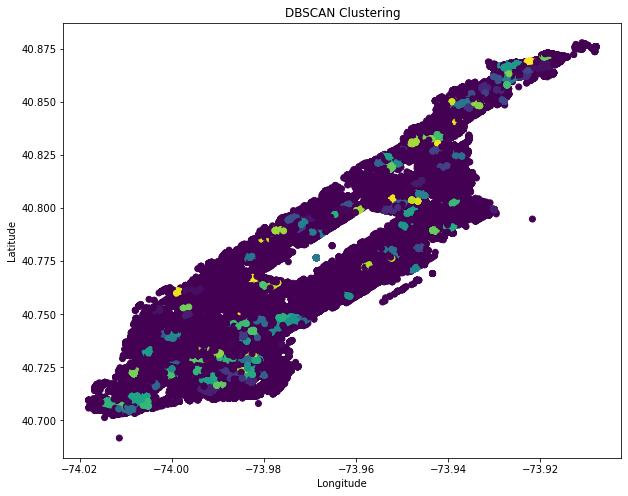

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(df_dbscan['Longitude'], df_dbscan['Latitude'], c=df_dbscan['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')

plt.show()

In [22]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_df = df_dbscan[df_dbscan['Cluster'] != -1]

heatmap_data = filtered_df[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

### Clusters are not optimal for covering all sections of central Manhattan 

# OPTICS Clustering

In [23]:
coords = df[['Latitude', 'Longitude']].values

In [24]:
optics_model = OPTICS(min_samples=100, metric='haversine')

In [25]:
optics_model.fit(np.radians(coords))

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(metric='haversine', min_samples=100)

In [26]:
labels = optics_model.labels_

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [28]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 166
Estimated number of noise points: 41887


In [29]:
df['Cluster'] = labels

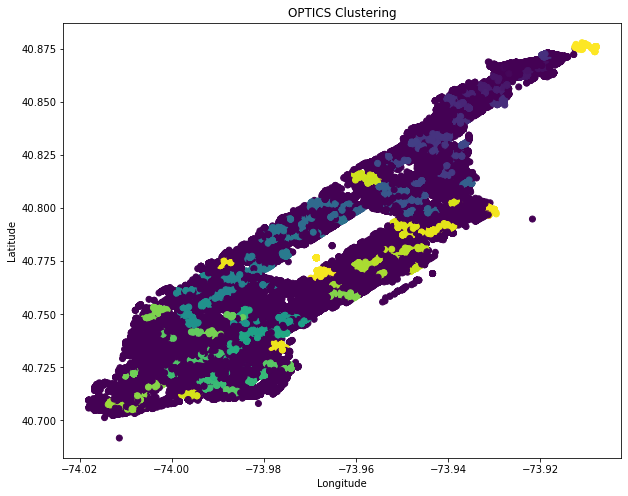

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('OPTICS Clustering')

plt.show()

In [31]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

filtered_optics = df[df['Cluster'] != -1]

heatmap_data = filtered_optics[['Latitude', 'Longitude']].values
heat_map = HeatMap(heatmap_data)

heat_map.add_to(manhattan_map)

manhattan_map

#### From the onset, OPTICS seems to develop a more detailed approach to clustering the longitude and latitude values within the dataset 
* The fact the model is creating based off the most optimal distance between longitude and latitude values led us to believe OPTICS was the best approach to clustering complaints within Manhattan
* However as can be seen above, the clusters contain a lot of bare spots around Manhattan which is not ideal for our approach to the application

In [32]:
complaint_counts = df.groupby(['Cluster', 'Hour', 'Day of Week']).size().reset_index(name='Noise Complaint Count')

In [33]:
df = df.merge(complaint_counts, on=['Cluster', 'Hour', 'Day of Week'], how='left')

In [34]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,255104.0,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,-1,564
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,222424.0,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,67,2
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,219485.0,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,163,1
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,228859.0,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,-1,564
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,249040.0,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,-1,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,228839.0,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,60,4
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,202474.0,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,-1,526
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,254344.0,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,7,7
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,235411.0,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,33,6


In [35]:
df_cluster = df[df['Cluster'] == 330]
df_cluster

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Y Coordinate (State Plane),Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count


=========================================

In [36]:
df['Noise Complaint Count'] = df.groupby(['Cluster', 'Hour', 'Day of Week'])['Complaint Type'].transform('count')

In [37]:
df['Noise Complaint Count'].unique()

array([564,   2,   1,   4, 452,   8, 292,   3, 202, 162,  89,  60,   6,
       130, 255, 212, 179, 150, 152, 174, 142, 194, 246, 236,   9, 271,
       331, 417,  13, 426, 328,  26,   5, 287, 173, 117, 146, 166, 183,
       177, 153, 143, 132, 157, 140, 175, 242, 309, 454, 584,   7,  15,
       658, 498,  22, 346, 208,  17, 127,  95, 171, 226, 203, 205, 169,
       192, 131, 147, 151,  19, 185, 257, 488, 661, 665,  10, 477, 399,
       256, 118, 211, 243, 184, 196, 186, 197, 144, 161, 158, 207, 244,
       340,  18, 633,  11, 679,  21, 486,  12, 378, 199,  16,  43, 209,
       201, 134, 163, 239, 342, 451, 598, 657, 468,  23, 363, 102, 124,
       112, 139, 155, 178, 160, 154, 133, 172, 241, 261, 408, 560, 659,
       557, 461,  34, 101, 129, 248, 444, 521, 386, 298, 233, 213, 217,
       187, 193, 206, 231, 306, 439, 526,  30,  74,  20,  14, 104, 149,
       176, 156,  33,  24, 105,  31,  28,  35,  29,  27,  40,  42,  38,
        32,  46,  52, 106,  39,  47,  48])

In [38]:
bins = [0, 500, 1000, 1500, 2000, np.inf]

In [39]:
labels = [0, 1, 2, 3, 4]

In [40]:
df['Noise Complaint Category'] = pd.cut(df['Noise Complaint Count'], bins=bins, labels=labels)

In [41]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,-1,564,1
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,67,2,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,163,1,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,-1,564,1
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,-1,564,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,60,4,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,-1,526,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,7,7,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,33,6,0


In [42]:
# Filter the dataframe
df_filtered = df[(df['Noise Complaint Category'] == 4)]
df_filtered

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category


In [43]:
df_cluster = df[["Cluster"]]
df_cluster['Cluster'].unique()

array([ -1,  67, 163, 126,  52, 161,  77,  26,   5, 133,  59,  33,  45,
       121, 162,  56,  81, 113,  12,  34, 155,  11,  48,  22, 108, 154,
        82,  75, 142,   9,  16, 144,  41, 152,   6,  97,  64,  53,  57,
        13,  27, 109,  25,  74,   7,  21,  23,  68,  14,  19, 150,  60,
         8, 106,  95,  65,  42, 123, 138, 110, 102, 134, 145,  38, 135,
        76,  92,  99,  87,  86,  73,  63,  72,  50,  93, 149, 158,  66,
        17, 164, 146,  61,  58, 104, 147,  40, 124, 151,  98,  32, 153,
        94, 115,  79, 159,  89,  85,  28,  69, 157,  96,   1, 111,  31,
        20,  47,  29,  44, 156, 107, 165, 140, 137, 148,  88,  90,  24,
        10,  54,  35, 131, 125, 136, 100, 116,   0, 122,  91,  46,  43,
       120, 132,  37, 143, 160,  70, 114,  49, 141, 118, 103, 112,  15,
        55,  39,  80,  18, 129, 128,   2,  36,  62,  51, 117, 105,  83,
       127,   4, 130, 119,  71,  30,  84, 139, 101,   3,  78])

In [44]:
df_filtered = df_filtered[["Noise Complaint Count"]]
df_filtered

,Noise Complaint Count


In [45]:
df_filtered.value_counts()

Series([], dtype: int64)

#### Too many -1 Clusters leading to imbalance with the binning values
* The lack of coverage for clusters around Manhattan has led us away from OPTICS even though it's method of optimal distancing is considered the greatest
* We want to create more clusters to increase the coverage and the accuracy for 'busyness' of specific areas

## Test K Means Clustering to create more clusters

In [46]:
coords = df[['Longitude','Latitude']].values

In [47]:
n_clusters = 500

In [48]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

In [49]:
df['Cluster'] = kmeans.fit_predict(coords)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,76,564,1
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,199,2,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,96,1,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,318,564,1
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,439,564,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,325,4,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,288,526,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,280,7,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,197,6,0


In [51]:
df['Noise Complaint Count'] = df.groupby(['Cluster', 'Hour', 'Day of Week'])['Complaint Type'].transform('count')

In [52]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,76,5,1
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,199,2,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,96,1,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,318,3,1
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,439,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,325,5,0
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,288,1,1
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,280,4,0
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,197,5,0


In [53]:
df_cluster = df[["Cluster"]]
df_cluster['Cluster'].unique()

array([ 76, 199,  96, 318, 439, 117, 437, 349, 153, 138, 259,  32, 129,
       251, 369, 411,  44, 293, 468, 454,  25, 197,  70,  99,  37, 352,
       110,  90, 438, 374, 266, 426, 112, 479,   7, 228, 480, 176, 253,
        34, 477, 145, 158, 409, 359,  74, 308,  53, 122, 132, 371, 373,
       455, 280, 191, 285, 123, 298, 353, 387, 287, 375, 179, 302,  24,
       425,   8, 448, 221, 327, 365, 231, 322, 182,  11, 244, 418, 402,
       296, 195,  77, 400, 282,  28, 137,  63,  85, 255, 136, 116, 339,
       303, 457, 170, 340,  18, 459, 127, 102, 292,  17,  84, 101, 279,
       386, 157, 486, 220, 488,  46, 165, 169, 151, 124, 364, 449,   9,
       424,  19,  81, 142, 167,  16, 408, 130, 470, 472, 230, 348, 392,
       432, 442,  64,  38, 325,   0, 434, 291, 482, 410,  23, 261, 166,
       211, 403, 461, 150, 436, 297, 427, 483, 489, 134, 380, 185, 412,
       241,  20, 361, 444, 354, 248, 263,  48, 399,  65, 416, 290, 334,
       133, 330, 406,  91, 499, 441, 471, 249, 332,  69, 358, 18

In [54]:
df_filtered = df[["Noise Complaint Count"]]
df_filtered.max()

Noise Complaint Count    107
dtype: int64

In [55]:
df_filtered.value_counts()

Noise Complaint Count
1                        20666
2                        16596
3                        10953
4                         6768
5                         4445
6                         3324
7                         2044
8                         1584
9                         1035
10                         830
11                         638
13                         611
12                         528
14                         378
16                         336
15                         255
20                         220
17                         204
33                         198
22                         198
19                         190
18                         180
23                         138
26                         130
31                         124
29                         116
107                        107
21                         105
52                         104
34                         102
24                          96
46               

In [56]:
# max_value = df['Noise Complaint Count'].max()

In [57]:
# bins = list(range(0, int(max_value) + 4, 4)) + [np.inf]

In [58]:
# labels = list(range(len(bins) - 1))

In [59]:
# df['Noise Complaint Category'] = pd.cut(df['Noise Complaint Count'], bins=bins, labels=labels)

In [60]:
# Create binning values for 25 noise complaint categories to ensure equal distributions 
df['Noise Complaint Category'] = pd.qcut(df['Noise Complaint Count'], q=30, labels=False, duplicates='drop')

In [61]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Open Data Channel Type,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,MOBILE,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,76,5,3
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,ONLINE,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,199,2,0
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,ONLINE,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,96,1,0
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,MOBILE,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,318,3,1
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,PHONE,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,439,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,PHONE,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,325,5,3
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,PHONE,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,288,1,0
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,ONLINE,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,280,4,2
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,PHONE,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,197,5,3


In [62]:
df['Noise Complaint Category'].value_counts()

0    37262
1    10953
2     6768
3     4445
4     3324
6     2619
9     2375
8     2154
5     2044
7     1996
Name: Noise Complaint Category, dtype: int64

In [63]:
df['Noise Complaint Category'].nunique()

10

## Check the value count for complaint categories to ensure all complaints aren't late in the evening

In [64]:
new_df = df[df['Noise Complaint Category'] == 24]

In [65]:
new_df['Hour'].value_counts()

Series([], Name: Hour, dtype: int64)

## Create the Model for Regression Capabilities

In [66]:
df['Final Noise Complaint Category'] = df['Noise Complaint Category'] / 25

In [67]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,76,5,3,0.12
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,199,2,0,0.00
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,96,1,0,0.00
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,318,3,1,0.04
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,439,2,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,325,5,3,0.12
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,288,1,0,0.00
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,280,4,2,0.08
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,197,5,3,0.12


In [68]:
hour_test = df[df["Cluster"] == 110]

In [69]:
hour_test['Hour'].value_counts()

23    21
0     21
22    18
1     11
21     8
19     7
20     6
12     5
18     4
17     4
9      4
8      4
6      3
5      3
3      3
15     3
7      3
14     1
11     1
16     1
4      1
2      1
10     1
13     1
Name: Hour, dtype: int64

In [70]:
hour_test['Hour'].nunique()

24

***

## Model Building and Testing

In [71]:
X = df[['Longitude', 'Latitude', 'Hour', 'Day of Week']]
y = df['Noise Complaint Category']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [74]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
y_pred = clf.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7428
           1       0.78      0.65      0.71      2202
           2       0.82      0.76      0.79      1337
           3       0.86      0.85      0.86       888
           4       0.87      0.89      0.88       688
           5       0.88      0.91      0.90       386
           6       0.90      0.92      0.91       528
           7       0.93      0.93      0.93       406
           8       0.95      0.97      0.96       445
           9       1.00      0.99      0.99       480

    accuracy                           0.86     14788
   macro avg       0.89      0.88      0.88     14788
weighted avg       0.85      0.86      0.85     14788



In [77]:
predictions = clf.predict(X_test)

In [78]:
new_data = [[-73.92717651087838, 40.8636089229268, 11, 1]]

In [79]:
prediction = clf.predict(new_data)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
print('Predicted NoiseRank:', prediction[0])

Predicted NoiseRank: 0


### Predictions are working using a classification approach but the model may need more testing to ensure the accuracy is in correlation with the classification report above

In [81]:
X_test_sample = [[-73.94508762577884, 40.81010795620323, 0, 1]] # Sample Input
y_test_sample = [1]  

In [82]:
y_pred_sample = clf.predict(X_test_sample)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
print("True label:", y_test_sample[0])
print("Predicted label:", y_pred_sample[0])

True label: 1
Predicted label: 0


#### On first inspection, our prediction may not be as accurate as the classification report is suggesting - Further analysis is required to ensure Random Forest Classifier is the most suitable model to use

In [84]:
y_pred = clf.predict(X_test)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Root Mean Squared Error:  0.9792960878601188
R2 score:  0.8528144674638218
Mean Absolute Error:  0.29523938328374355


================================

In [86]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)

end_time = time.time()

rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 8.02416706085205 seconds


In [87]:
noise_ranks = rf_model.predict(X_test)

In [88]:
predictions = pd.DataFrame({'Actual': y_test.astype(int).values, 'Predicted': noise_ranks})

In [89]:
print(predictions)

       Actual  Predicted
0           2          2
1           6          6
2           8          8
3           1          1
4           4          4
...       ...        ...
14783       0          0
14784       0          3
14785       9          9
14786       0          0
14787       1          0

[14788 rows x 2 columns]


#### Predictions seem to be more accurate than the sample prediction eluded to previously

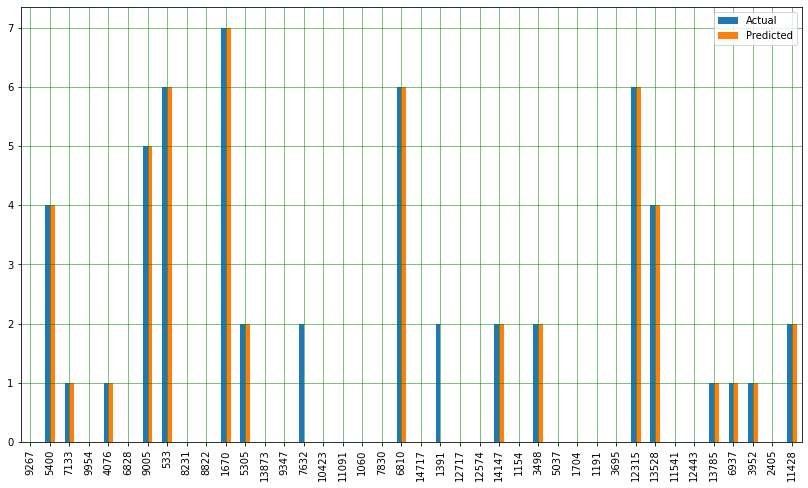

In [90]:
predictions.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Logic Regression Model

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.10380763829825
R-squared score: -0.4785182157783816
Mean absolute error: 1.7657560183932919


/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear Regression Model

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.5384268698920014
R-squared score: 0.011068075643791753
Mean absolute error: 1.978405203738274


## SVM - Support Vector Model

In [93]:
from sklearn import svm

model_svm = svm.SVR()
model_svm.fit(X_train[:1000], y_train[:1000])

y_pred = model_svm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("SVM - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("SVM - R-squared score:", r2)

print("SVM - Mean absolute error:", mean_absolute_error(y_test, y_pred))

SVM - Root Mean Squared Error (RMSE): 2.830156352037124
SVM - R-squared score: -0.22930017084841436
SVM - Mean absolute error: 1.7304250191232005


## KNN - K Nearest Neighbour

In [94]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("KNN - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("KNN - R-squared score:", r2)

print("KNN - Mean absolute error:", mean_absolute_error(y_test, y_pred))

KNN - Root Mean Squared Error (RMSE): 1.5040293909961515
KNN - R-squared score: 0.6528239716259885
KNN - Mean absolute error: 0.6544495536921828


## Naive Baynes

In [95]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Naive Bayes - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Naive Bayes - R-squared score:", r2)

print("Naive Bayes - Mean absolute error:", mean_absolute_error(y_test, y_pred))

Naive Bayes - Root Mean Squared Error (RMSE): 3.10380763829825
Naive Bayes - R-squared score: -0.4785182157783816
Naive Bayes - Mean absolute error: 1.7657560183932919


## XGBoost

In [96]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("XGBoost - Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("XGBoost - R-squared score:", r2)

print("XGBoost - Mean absolute error:", mean_absolute_error(y_test, y_pred))

XGBoost - Root Mean Squared Error (RMSE): 1.6624537139970619
XGBoost - R-squared score: 0.5758336525565317
XGBoost - Mean absolute error: 1.2431607438918264


## Random Forest Classifier

In [97]:
model = RandomForestClassifier(n_estimators = 20, random_state = 36)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.0324397496339872
R-squared score: 0.8364063214378948
Mean absolute error: 0.3224912090884501


### Based on the above metrics, the Random Forest Classifier (RFC) model performs the best having the lowest RMSE, the highest R-squared score, and the lowest MAE
### However, we may need to change our approach to use continuous data  

### Test model metrics for regressional approaches so we incorporate binning values between 0 and 1 for heat map purposes

In [98]:
X = df[['Longitude', 'Latitude', 'Hour', 'Day of Week']]
y = df['Final Noise Complaint Category']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

In [103]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.10153707479567953


In [104]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.0110680756438023


In [105]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 0.0791362081495336


#### This may be an indicator to test other models to see if others may be more accurate 

In [106]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [107]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- Training time: {model_time}\n")

Ridge:
- RMSE: 0.10153048033495445
- R-squared: 0.011196526477651902
- MAE: 0.07913989133259075
- Training time: 0.009277105331420898

Lasso:
- RMSE: 0.1021056169634381
- R-squared: -3.76927380416614e-05
- MAE: 0.07988741684932822
- Training time: 0.005034923553466797

Decision Tree:
- RMSE: 0.0513680835813405
- R-squared: 0.7468931908410442
- MAE: 0.019751149580741152
- Training time: 0.18693208694458008

Random Forest:
- RMSE: 0.03895880237367581
- R-squared: 0.8544110890446515
- MAE: 0.023387124695699243
- Training time: 12.48313021659851

Gradient Boosting:
- RMSE: 0.07911474322366065
- R-squared: 0.39961207729511605
- MAE: 0.06036381449662348
- Training time: 3.57620906829834



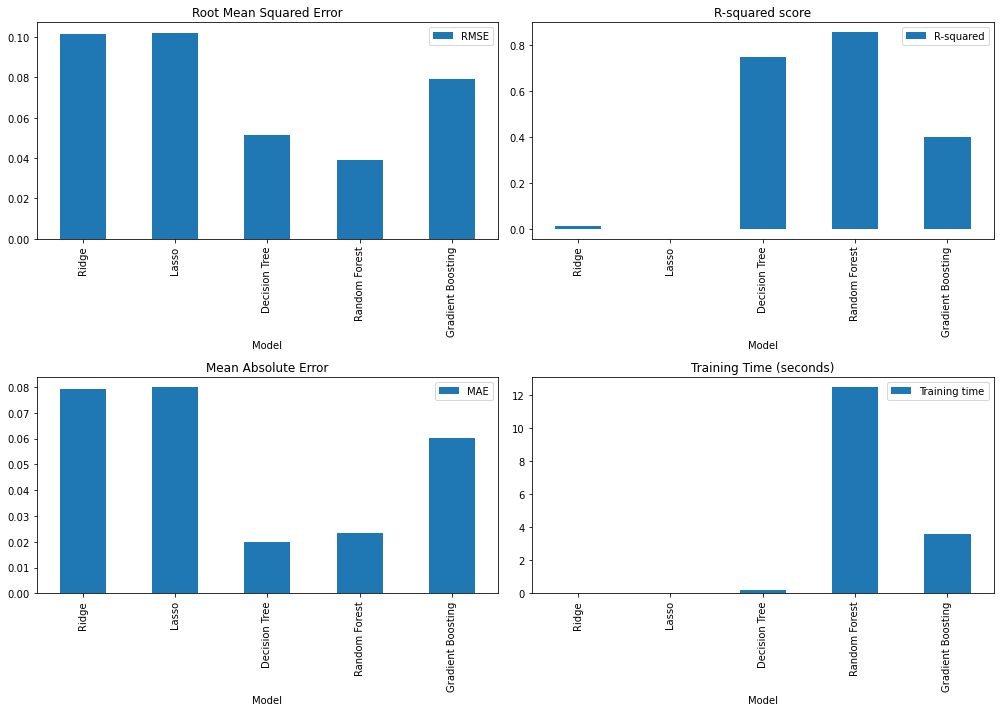

In [108]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling 
#### While saying this however, there is a huge contrast between the training time of the Random Forest Regressor and the Decision Tree Regressor - With this being said, I have decided to use the Decision Tree Regressor to enhance the performance based off runtime
* Below is the approach and further analysis of the model to ensure we have made the correct choice

## Decision Tree Regressor

In [109]:
dt_model = DecisionTreeRegressor(random_state=36)

In [110]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

In [111]:
y_pred = dt_model.predict(X_test)

In [112]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [113]:
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree - R-squared score:", r2)
print("Decision Tree - Mean absolute error:", mae)

Decision Tree - Root Mean Squared Error (RMSE): 0.051628602322411905
Decision Tree - R-squared score: 0.7443193640134478
Decision Tree - Mean absolute error: 0.01994590208276982


In [114]:
start_time = time.time()

dt_model = DecisionTreeRegressor(random_state=36)
dt_model = dt_model.fit(X_train, y_train)

end_time = time.time()

dt_time = end_time - start_time
print(f"Time taken to train Random Forest model : {dt_time} seconds")

Time taken to train Random Forest model : 0.1694779396057129 seconds


In [115]:
predictions = dt_model.predict(X_test)

In [116]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

       Actual  Predicted
0        0.08       0.08
1        0.24       0.24
2        0.32       0.32
3        0.04       0.04
4        0.16       0.16
...       ...        ...
14783    0.00       0.00
14784    0.00       0.12
14785    0.36       0.36
14786    0.00       0.00
14787    0.04       0.00

[14788 rows x 2 columns]


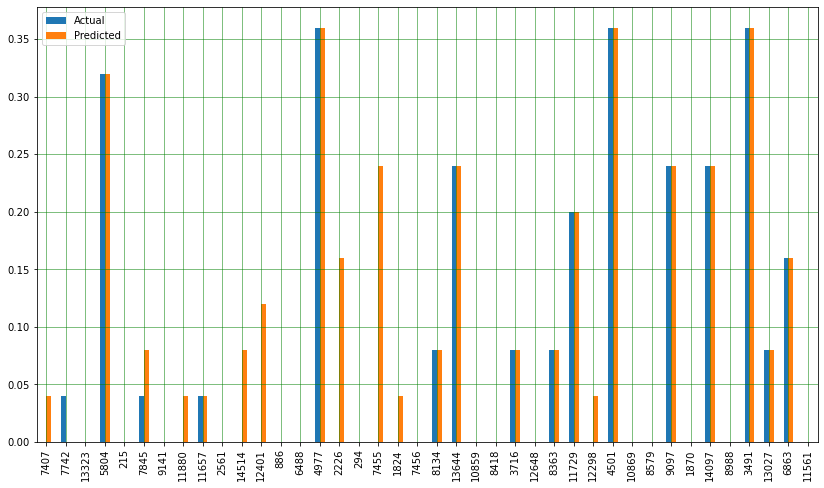

In [117]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

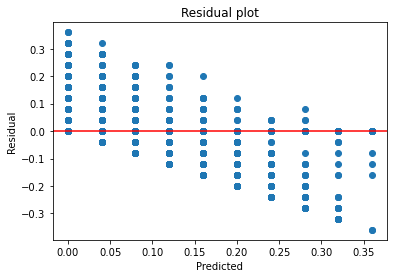

In [118]:
y_pred = dt_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [119]:
importances = list(dt_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [120]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: Longitude            Importance: 0.39
Variable: Latitude             Importance: 0.3
Variable: Hour                 Importance: 0.18
Variable: Day of Week          Importance: 0.13


In [121]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.1837 ± 0.0074,Longitude
0.9763 ± 0.0253,Hour
0.9207 ± 0.0303,Latitude
0.5167 ± 0.0145,Day of Week


### Run a basic test

In [122]:
# example test data 
X_test = [[-73.97419882396352, 40.79478336240544, 23, 5]] 
y_test = [0.72] # replace this with actual test data

In [123]:
y_pred = dt_model.predict(X_test)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [124]:
print("Predicted output:", y_pred)

Predicted output: [0.12]


## Final test against the more accurate Random Forest Regressor

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
rf_model = RandomForestRegressor(n_estimators = 20, random_state = 36)

In [127]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=36)

In [128]:
y_pred = rf_model.predict(X_test)

In [129]:
predictions = rf_model.predict(X_test)

In [130]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

       Actual  Predicted
0        0.08      0.068
1        0.24      0.198
2        0.32      0.320
3        0.04      0.030
4        0.16      0.160
...       ...        ...
14783    0.00      0.006
14784    0.00      0.070
14785    0.36      0.360
14786    0.00      0.008
14787    0.04      0.012

[14788 rows x 2 columns]


In [131]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [132]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.039977992999435524
Random Forest - R-squared score: 0.8466940266186385
Random Forest - Mean absolute error: 0.023689072220719507


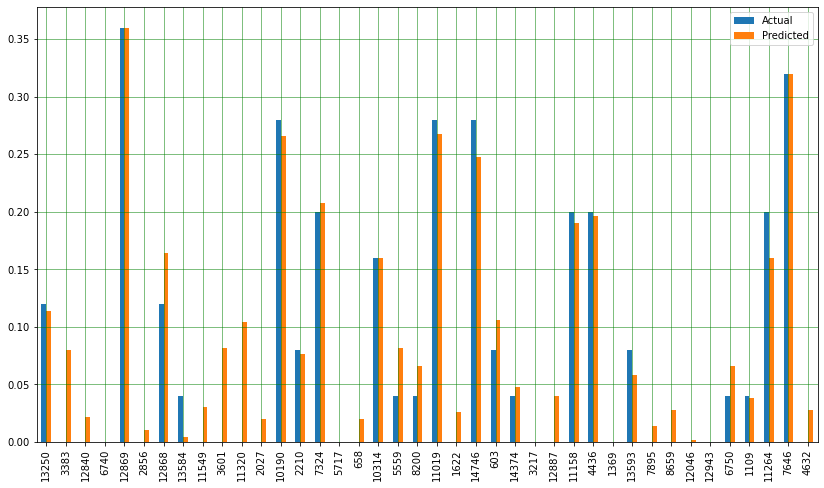

In [133]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

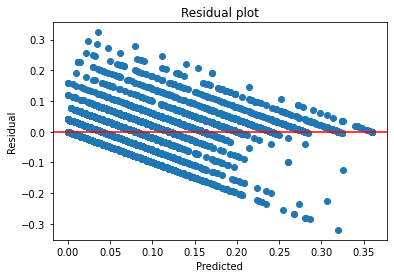

In [134]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [135]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [136]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: Longitude            Importance: 0.38
Variable: Latitude             Importance: 0.32
Variable: Hour                 Importance: 0.18
Variable: Day of Week          Importance: 0.12


In [137]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.9541 ± 0.0091,Longitude
0.8789 ± 0.0197,Hour
0.7892 ± 0.0160,Latitude
0.4393 ± 0.0142,Day of Week


<b> After some rigorous testing and as a group, we have decided against the Decision Tree model even though it is more optimal for runtime. Rendering the model is no longer an issue for the group as we have decided to use a database to store daily model predictions so model runtime is not necessary for us anymore. With this in mind, we have decided to return to the most accurate model to ensure the best quality routing for the web application.

## Create pkl file with RF model

In [138]:
# pkl_filename = "noise_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf_model, file)

## Create a CSV file for backend rendering

In [139]:
df

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,...,Latitude,Longitude,Location,Hour,Month,Day of Week,Cluster,Noise Complaint Count,Noise Complaint Category,Final Noise Complaint Category
0,2017-01-01 00:21:57,2017-01-01 03:50:20,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,4871 BROADWAY,BROADWAY,ACADEMY STREET,WEST 204 STREET,...,40.866851,-73.923590,"(40.86685083638424, -73.92358999813483)",0,1,6,76,5,3,0.12
1,2017-01-01 00:28:25,2017-04-14 11:32:08,Noise - Helicopter,Other,Above Address,10023.0,23 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,...,40.777176,-73.976094,"(40.777176308465414, -73.97609400658231)",0,1,6,199,2,0,0.00
2,2017-01-01 00:32:51,2017-01-01 04:47:09,Noise - Residential,Loud Talking,Residential Building/House,10065.0,32 EAST 68 STREET,EAST 68 STREET,MADISON AVENUE,PARK AVENUE,...,40.769107,-73.967053,"(40.769107291695136, -73.96705336575685)",0,1,6,96,1,0,0.00
3,2017-01-01 00:37:20,2017-01-01 03:58:23,Noise - Residential,Banging/Pounding,Residential Building/House,10029.0,4 EAST 107 STREET,EAST 107 STREET,5 AVENUE,MADISON AVENUE,...,40.794830,-73.950344,"(40.794830448783166, -73.95034425614466)",0,1,6,318,3,1,0.04
4,2017-01-01 00:37:39,2017-01-01 03:50:21,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10033.0,WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,...,40.850211,-73.930339,"(40.850211242326274, -73.93033949342616)",0,1,6,439,2,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,2017-12-30 23:31:07,2017-12-31 12:54:28,Noise - Residential,Loud Talking,Residential Building/House,10025.0,310 WEST 95 STREET,WEST 95 STREET,WEST END AVENUE,HENRY HUDSON PARKWAY ET 11 SB,...,40.794783,-73.974199,"(40.79478336240544, -73.97419882396352)",23,12,5,325,5,3,0.12
73936,2017-12-30 23:46:00,2018-01-06 11:45:00,Noise,Noise: Alarms (NR3),NaN,10013.0,55 GREENE STREET,GREENE STREET,GRAND ST,BROOME ST,...,40.722421,-74.001533,"(40.72242106231787, -74.00153325775658)",23,12,5,288,1,0,0.00
73937,2017-12-30 23:50:23,2017-12-31 07:14:21,Noise - Residential,Banging/Pounding,Residential Building/House,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ACADEMY STREET,WEST 204 STREET,...,40.864764,-73.922764,"(40.86476431663921, -73.92276447154296)",23,12,5,280,4,2,0.08
73938,2017-12-30 23:55:59,2017-12-31 02:31:10,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,WEST 131 STREET,7 AVENUE,8 AVENUE,...,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",23,12,5,197,5,3,0.12


In [140]:
df.to_csv("Noise_Model_Data_DayofWeek.csv")